In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, StratifiedKFold
from collections import Counter

C:\Users\MirTanveer\anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MirTanveer\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\MirTanveer\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Import the ensemble model

In [2]:
import pickle
ensemble_model = pickle.load(open('C:/Users/MirTanveer/Desktop/iTTCA/Trained_Models/Ensemble_Model.pkl', 'rb'))

# Testing model on the independent dataset

In [3]:
ind_data=pd.read_csv(r"C:/Users/MirTanveer/Desktop/iTTCA/Dataframe_/Optuna_PP_150_Testing.csv")
X_test = ind_data.iloc[:,1:-1].values
y_test = ind_data.iloc[:,-1].values

In [4]:
print('Shape of X_test is :', X_test.shape)
print('Shape of y_test is :', y_test.shape)

Shape of X_test is : (197, 150)
Shape of y_test is : (197,)


Accuracy=   0.8020304568527918
Sensitivity=  0.9098360655737705
Specificity=  0.6266666666666667
MCC Score=  0.5715590269005417
Area Under Curve=  0.840983606557377


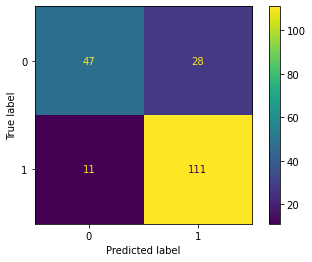

In [5]:
# Evaluate Model on Ind data
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Make predictions
y_pred = ensemble_model.predict(X_test)
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
#Sn and Sp
spec = cm[0,0]/(cm[0,1]+cm[0,0])
sen= cm[1,1]/(cm[1,0]+cm[1,1])
#Print
print('Accuracy=  ', metrics.accuracy_score(y_test, y_pred))
print('Sensitivity= ', sen)
print('Specificity= ', spec)
print('MCC Score= ', matthews_corrcoef(y_test, y_pred))
print('Area Under Curve= ', metrics.roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:,1] ))
#print('Confusion Matrix=\n', metrics.confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Testing model on the new dataset (14 samples)

In [6]:
new_data=pd.read_csv(r"C:/Users/MirTanveer/Desktop/iTTCA/New_Val_Dataframe/Optuna_150PP_new_val _14.csv")
X_val = new_data.iloc[:,0:-1].values
y_val = new_data.iloc[:,-1].values

In [7]:
print('Shape of X_val is :', X_val.shape)
print('Shape of y_val is :', y_val.shape)

Shape of X_val is : (14, 150)
Shape of y_val is : (14,)


Accuracy=   0.7142857142857143
Sensitivity=  0.8888888888888888
Specificity=  0.4
MCC Score=  0.3373495424699933
Area Under Curve=  0.6444444444444444


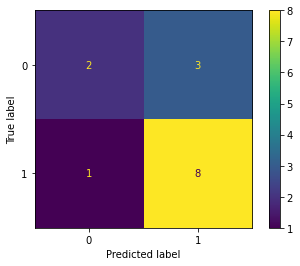

In [8]:
# Evaluate Model on New dataset
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Make predictions
y_pred = ensemble_model.predict(X_val)
#Confusion Matrix
cm = metrics.confusion_matrix(y_val, y_pred)
#Sn and Sp
spec = cm[0,0]/(cm[0,1]+cm[0,0])
sen= cm[1,1]/(cm[1,0]+cm[1,1])
#Print
print('Accuracy=  ', metrics.accuracy_score(y_val, y_pred))
print('Sensitivity= ', sen)
print('Specificity= ', spec)
print('MCC Score= ', matthews_corrcoef(y_val, y_pred))
print('Area Under Curve= ', metrics.roc_auc_score(y_val, y_pred))
#print('Confusion Matrix=\n', metrics.confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()